In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
 # Import SQLAlchemy `automap` and other dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, text

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
 # Create the inspector and connect it to the engine

# INSPECT
inspector_gadget = inspect(engine)

# get all tables
table_names = inspector_gadget.get_table_names()
for table in table_names:
    print(table)

    # get columns for table
    for column in inspector_gadget.get_columns(table):
        print(column)

    print()

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoi

In [6]:
# View all of the classes that automap found


['measurement', 'station']

In [7]:
# Save references to each table


In [8]:
# Create our session (link) from Python to the DB


# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
query = text("""
                SELECT
                    date,
                    count(*) as num_rows
                FROM
                    measurement
                group by
                    date
                order by
                    date desc
                limit 10
            """)

pd.read_sql(query, engine)

,date,num_rows
0,2017-08-23,4
1,2017-08-22,3
2,2017-08-21,4
3,2017-08-20,3
4,2017-08-19,4
5,2017-08-18,4
6,2017-08-17,4
7,2017-08-16,4
8,2017-08-15,5
9,2017-08-14,5


In [9]:
query = text("""
                SELECT
                    date,
                    station,
                    prcp
                FROM
                    measurement
                WHERE
                    date >= '2016-08-23';
            """)

df = pd.read_sql(query, engine)
df.head()

,date,station,prcp
0,2016-08-23,USC00519397,0.00
1,2016-08-24,USC00519397,0.08
2,2016-08-25,USC00519397,0.08
3,2016-08-26,USC00519397,0.00
4,2016-08-27,USC00519397,0.00


In [10]:
df["date"] = pd.to_datetime(df["date"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     2230 non-null   datetime64[ns]
 1   station  2230 non-null   object        
 2   prcp     2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 52.4+ KB


In [11]:
df1 = df.dropna().sort_values(by="date", ascending=True).reset_index(drop=True)
df1.head(10)

,date,station,prcp
0,2016-08-23,USC00519397,0.00
1,2016-08-23,USC00519523,0.02
2,2016-08-23,USC00514830,0.05
3,2016-08-23,USC00516128,0.70
4,2016-08-23,USC00513117,0.15
5,2016-08-23,USC00519281,1.79
6,2016-08-24,USC00519523,1.22
7,2016-08-24,USC00519397,0.08
8,2016-08-24,USC00519281,2.15
9,2016-08-24,USC00513117,2.15


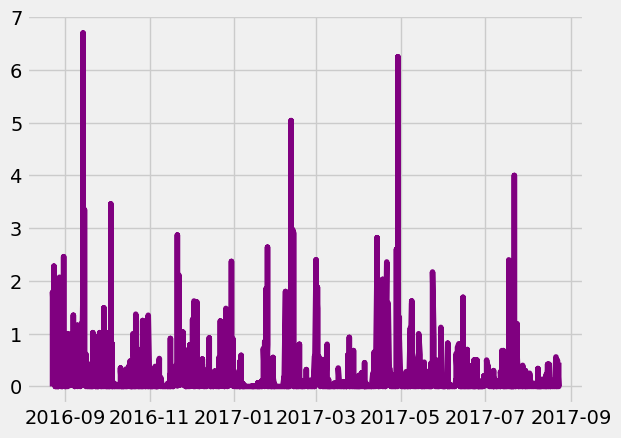

In [12]:
plt.plot(df1.date, df1.prcp, color="purple")
plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
df1.prcp.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
query = text("""
                SELECT
                    *
                FROM
                    station
            """)

df2 = pd.read_sql(query, engine)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         9 non-null      int64  
 1   station    9 non-null      object 
 2   name       9 non-null      object 
 3   latitude   9 non-null      float64
 4   longitude  9 non-null      float64
 5   elevation  9 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 560.0+ bytes


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query = text("""
                SELECT
                    station,
                    count(*) as num_obs
                FROM
                    measurement
                group by
                    station
                order by
                    num_obs desc;
            """)

pd.read_sql(query, engine)

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
query = text("""
                SELECT
                    station,
                    min(prcp),
                    avg(prcp),
                    max(prcp)
                FROM
                    measurement
                where
                    station = 'USC00519281';
            """)

pd.read_sql(query, engine)

,station,min(prcp),avg(prcp),max(prcp)
0,USC00519281,0.0,0.212352,9.64


In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = text("""
                SELECT
                    date,
                    station,
                    tobs
                FROM
                    measurement
                WHERE
                    date >= '2016-08-23'
                    and station = 'USC00519281'
            """)

df = pd.read_sql(query, engine)
df.head()

,date,station,tobs
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


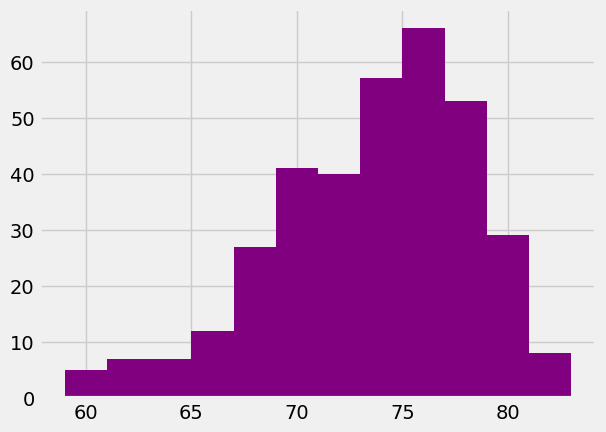

In [25]:
plt.hist(df.tobs, bins=12, color="purple")
plt.show()

# Close Session